## Import

In [45]:
from pathlib import Path
from datetime import datetime, timedelta

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib widget

In [2]:
cd /home/sanjyot/latcom

/home/sanjyot/latcom


In [3]:
from preprocess import truncate_filenames, extract_datetime

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
data_dir = Path('.').resolve() / 'dataset' / 'udacity_simulator' / 'tracks'
label_path = data_dir / 'driving_log.csv'
print(f'Data dir: {data_dir}\nLabel file: {label_path}')

Data dir: /home/sanjyot/latcom/dataset/udacity_simulator/tracks
Label file: /home/sanjyot/latcom/dataset/udacity_simulator/tracks/driving_log.csv


In [6]:
lbl = (
    pd.read_csv(
        label_path, 
        names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
    )
    .pipe(truncate_filenames)
    .assign(
        datetime = lambda x: x['center'].apply(extract_datetime),
        next_datetime = lambda x: x['datetime'].shift(-1)
    )
    .dropna()
    .assign(
        time_gap = lambda x: (x['next_datetime'] - x['datetime']).dt.microseconds
    )
)

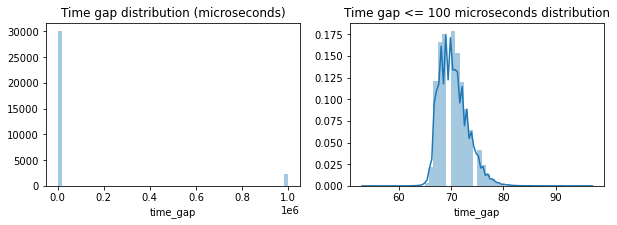

In [37]:
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.distplot(lbl['time_gap'], kde=False, ax=ax[0])
sns.distplot(lbl[lbl['time_gap'] <= 100]['time_gap'], kde=True, ax=ax[1])
ax[0].set_title('Time gap distribution (microseconds)')
ax[1].set_title('Time gap <= 100 microseconds distribution')
plt.show()

## Map time shifted labels

In [22]:
offset_ms = 40  # Milliseconds

offset_us = offset_ms * 1000

In [23]:
l = lbl[['center', 'datetime']]

In [24]:
l.head()

,center,datetime
0,center_2019_04_02_19_25_33_671.jpg,2019-04-02 19:25:33.000671
1,center_2019_04_02_19_25_33_743.jpg,2019-04-02 19:25:33.000743
2,center_2019_04_02_19_25_33_816.jpg,2019-04-02 19:25:33.000816
3,center_2019_04_02_19_25_33_887.jpg,2019-04-02 19:25:33.000887
4,center_2019_04_02_19_25_33_959.jpg,2019-04-02 19:25:33.000959


In [46]:
%matplotlib widget
(
    l
    .assign(y=1)
    .loc[lambda x: (x['datetime'].dt.hour == 18) & (x['datetime'].dt.minute == 10) & (x['datetime'].dt.second <= 2)]
    .pipe((sns.relplot, 'data'), x='datetime', y='y', kind='scatter', aspect=3, height=3)
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [62]:
def shift_labels(df, offset, tolerance):
    dfcopy = df.copy().rename(columns={'datetime': 'shifted_datetime'})
    dfcopy['shifted_datetime'] -= offset
    return pd.merge_asof(df, dfcopy, 
                         left_on='datetime', 
                         right_on='shifted_datetime',
                         tolerance=tolerance, 
                         direction='nearest')

In [63]:
lsmall = l.iloc[:10,:]

In [67]:
offset = timedelta(milliseconds=60)
tolerance = timedelta(microseconds=30)

x = shift_labels(lsmall, offset=offset, tolerance=tolerance)
x

,center_x,datetime,center_y,shifted_datetime
0,center_2019_04_02_19_25_33_671.jpg,2019-04-02 19:25:33.000671,NaN,NaT
1,center_2019_04_02_19_25_33_743.jpg,2019-04-02 19:25:33.000743,NaN,NaT
2,center_2019_04_02_19_25_33_816.jpg,2019-04-02 19:25:33.000816,NaN,NaT
3,center_2019_04_02_19_25_33_887.jpg,2019-04-02 19:25:33.000887,NaN,NaT
4,center_2019_04_02_19_25_33_959.jpg,2019-04-02 19:25:33.000959,NaN,NaT
5,center_2019_04_02_19_25_34_029.jpg,2019-04-02 19:25:34.000029,NaN,NaT
6,center_2019_04_02_19_25_34_101.jpg,2019-04-02 19:25:34.000101,NaN,NaT
7,center_2019_04_02_19_25_34_171.jpg,2019-04-02 19:25:34.000171,NaN,NaT
8,center_2019_04_02_19_25_34_243.jpg,2019-04-02 19:25:34.000243,NaN,NaT
9,center_2019_04_02_19_25_34_313.jpg,2019-04-02 19:25:34.000313,NaN,NaT


In [65]:
x

,center_x,datetime,center_y,shifted_datetime
0,center_2019_04_02_19_25_33_671.jpg,2019-04-02 19:25:33.000671,NaN,NaT
1,center_2019_04_02_19_25_33_743.jpg,2019-04-02 19:25:33.000743,NaN,NaT
2,center_2019_04_02_19_25_33_816.jpg,2019-04-02 19:25:33.000816,NaN,NaT
3,center_2019_04_02_19_25_33_887.jpg,2019-04-02 19:25:33.000887,NaN,NaT
4,center_2019_04_02_19_25_33_959.jpg,2019-04-02 19:25:33.000959,NaN,NaT
5,center_2019_04_02_19_25_34_029.jpg,2019-04-02 19:25:34.000029,NaN,NaT
6,center_2019_04_02_19_25_34_101.jpg,2019-04-02 19:25:34.000101,NaN,NaT
7,center_2019_04_02_19_25_34_171.jpg,2019-04-02 19:25:34.000171,NaN,NaT
8,center_2019_04_02_19_25_34_243.jpg,2019-04-02 19:25:34.000243,NaN,NaT
9,center_2019_04_02_19_25_34_313.jpg,2019-04-02 19:25:34.000313,NaN,NaT
